## Проверка

In [1]:
import torch

# Проверка версии
print("PyTorch version:", torch.__version__)

# Доступность GPU
print("CUDA available:", torch.cuda.is_available())

# Название GPU (если есть)
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))
else:
    print("GPU не обнаружен.")

PyTorch version: 2.0.1+cu118
CUDA available: True
GPU: NVIDIA L4


## Анализ данных и исследование классов

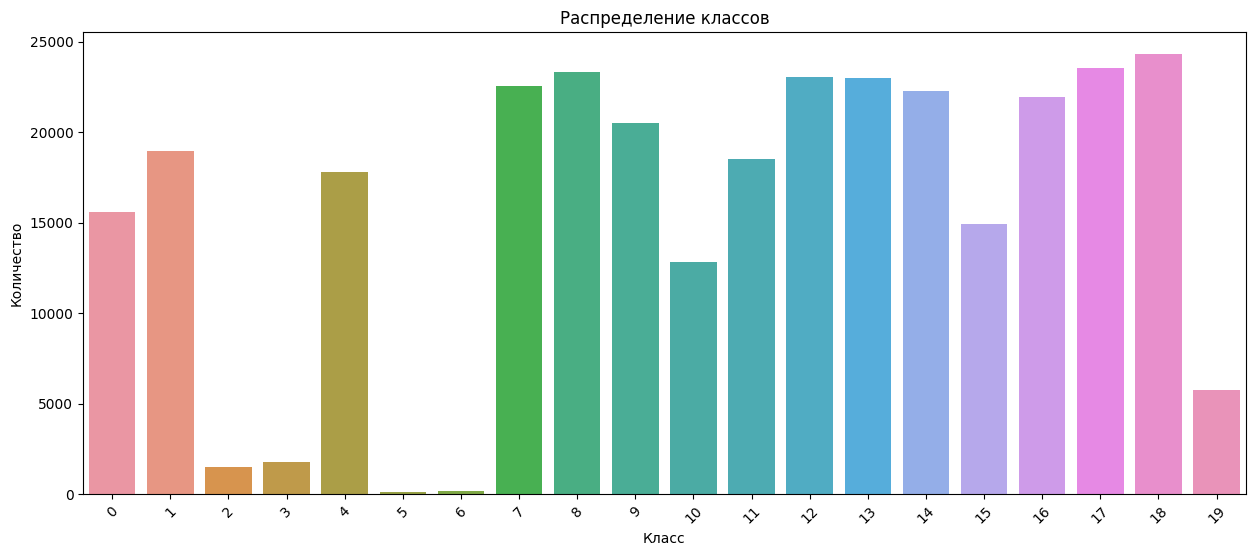

Примеры текстов для разных классов:

Класс 0:
ID: 17158, Текст: ✅
"РЕКВИЕМ" ДЖУЗЕППЕ ВЕРДИ В ЗАРЯДЬЕ
✅
К 85-летию со дня рождения ЕЛЕНЫ ОБРАЗЦОВОЙ 2 мая в 19.00 в з...
ID: 13189, Текст: АФИША ВЕЧЕРНИХ МЕРОПРИЯТИЙ
с 20 по 26 мая 2024 года, начало в 19:30
г. Пятигорск | Кофейня "Happy Co...
ID: 2677, Текст: МОСКВА • 2 марта |19:00 - 22:30
ТАЙСКИЙ МАССАЖ В ПАРАХ. Ведущий ЛЕО ВАРД.
ТЕМА: «БОКОВЫЕ СКРУТКИ, ПО...

Класс 1:
ID: 23615, Текст: Спектакль «Феноменальный успех»
🏛
Выборгский Дворец Культуры
📍
ул. Комиссара Смирнова, 15
🗓
22 мая
🎫...
ID: 22511, Текст: Комедия "С кем поведешься..."
🏛
ДК Выборгский
🗓
11 февраля 14:00 и 19:00
🎫
Билеты на 14:00 по ссылке...
ID: 27109, Текст: 23 ноября
Тренинг по безопасности
в детском клубе с психологом
14-40 1200р
Сиреневая 1, Чесноковка
Т...

Класс 2:
ID: 1732, Текст: Доброй ночи и приятных снов
🖤...
ID: 24158, Текст: ДК Ленсовета. 29 декабря (четверг) 19:00
Новогодний концерт. «Зажигая Звезды»
Скидка 15% по промокод...
ID: 26846, Текст: 🚕
🚕
💥
🚕
🚕
💥
🚕

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Загрузка данных
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Преобразование меток в матрицу
labels = train['labels'].str.split(' ', expand=True).astype(int)
label_counts = labels.sum(axis=0)

# Визуализация распределения классов
plt.figure(figsize=(15, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

# Анализ текстов
print("Примеры текстов для разных классов:")
for i in range(5):  # Для первых 5 классов
    class_samples = train[labels[i] == 1].sample(3)
    print(f"\nКласс {i}:")
    for _, row in class_samples.iterrows():
        print(f"ID: {row['id']}, Текст: {row['text'][:100]}...")

Train shape: (29568, 22)
Test shape: (7392, 2)

Train columns: ['id', 'text', 'label_0', 'label_1', 'label_2', 'label_3', 'label_4', 'label_5', 'label_6', 'label_7', 'label_8', 'label_9', 'label_10', 'label_11', 'label_12', 'label_13', 'label_14', 'label_15', 'label_16', 'label_17', 'label_18', 'label_19']

Missing values in train: id          0
text        0
label_0     0
label_1     0
label_2     0
label_3     0
label_4     0
label_5     0
label_6     0
label_7     0
label_8     0
label_9     0
label_10    0
label_11    0
label_12    0
label_13    0
label_14    0
label_15    0
label_16    0
label_17    0
label_18    0
label_19    0
dtype: int64


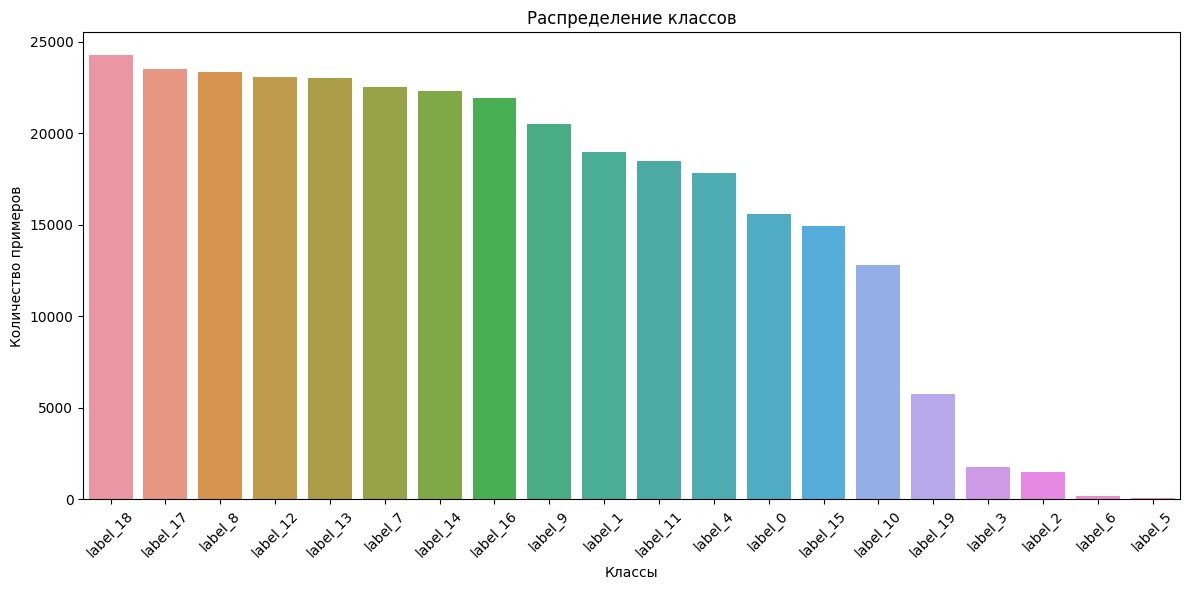

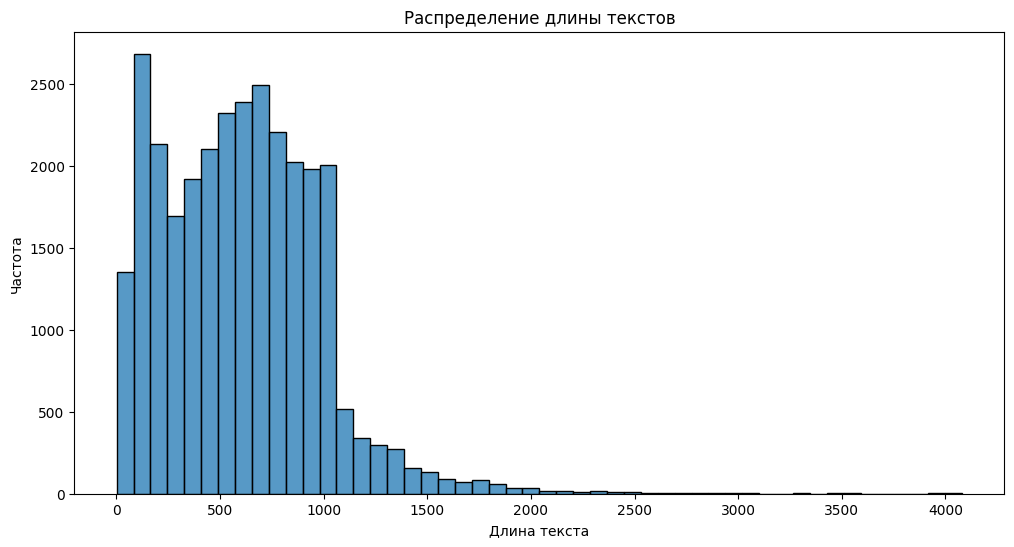


Примеры текстов для класса label_18:
1. 7 Секретов Клуба Миллионеров  - финансовое шоу в Москве от долларового миллионера
💰
.
🔥
WOW
🔥
система от тренера №1 по финансам в СНГ!
🎤
Максим Темченко.
— Бизнес-тренер, инвестор,
основатель "Клуба М...
2. МУЗЫКАЛЬНЫЙ СПЕКТАКЛЬ «ХАНУМА»(12+)
21 ноября 2024 года, начало в 19:00
г. Ессентуки | КЗ им. Шаляпина | Билеты от 1000р.
В рамках фестиваля «Бархатный сезон». Музыкальный спектакль по мотивам пьесы А...
3. Ферма Хоббитов в Тверской области
🌿
Дизайнерские домики хоббитов, где каждая деталь создана с душой и уютные треугольные дома гостеприимно открывают двери всем желающим отдохнуть от городской суеты и ...

Примеры текстов для класса label_17:
1. ОЧЕРЕДНОЙ ЭТАП СКАЧЕК
7 июля 2024 года, начало в 12:00
г. Пятигорск | Пятигорский Ипподром | Билеты 500р.
В это воскресенье на Пятигорском ипподроме состоится 11 скачек на дистанции от 1000 до 2400 ме...
2. 🤩
КАК СТАТЬ ЗВЕЗДОЙ ОФЛАЙНА ЗА 7 ДНЕЙ, СОБРАВ СВОЁ МЕРОПРИЯТИЕ НА 100+ ЧЕЛОВЕК
🎤
Авторский шо

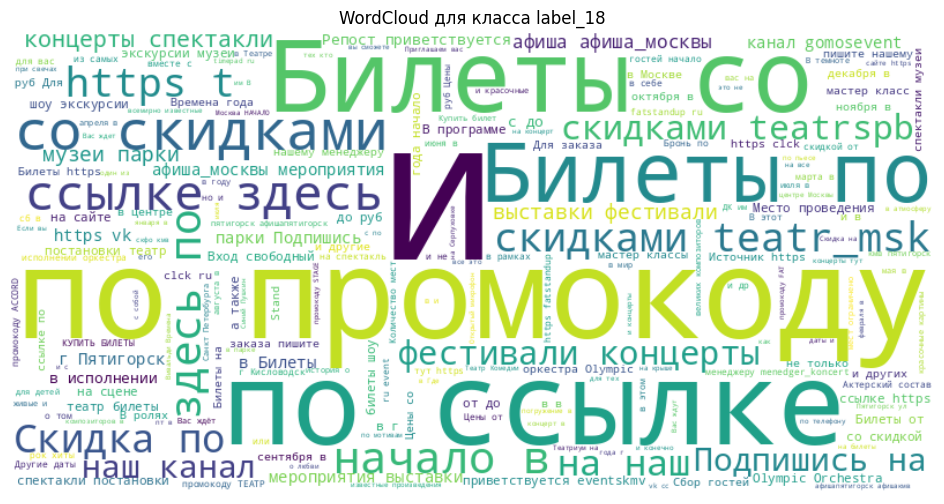

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

# Загрузка данных
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Преобразуем строку с метками в отдельные бинарные колонки
def split_labels(label_str):
    return [int(x) for x in label_str.split()]

# Создаем отдельные колонки для каждой метки
labels = train_df['labels'].apply(split_labels).tolist()
label_columns = [f'label_{i}' for i in range(len(labels[0]))]
labels_df = pd.DataFrame(labels, columns=label_columns)
train_df = pd.concat([train_df.drop('labels', axis=1), labels_df], axis=1)

# Анализ структуры данных
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("\nTrain columns:", train_df.columns.tolist())
print("\nMissing values in train:", train_df.isnull().sum())

# Анализ распределения классов
label_counts = train_df[label_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Распределение классов')
plt.xlabel('Классы')
plt.ylabel('Количество примеров')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Анализ длины текстов
train_df['text_length'] = train_df['text'].apply(lambda x: len(str(x)))
plt.figure(figsize=(12, 6))
sns.histplot(train_df['text_length'], bins=50)
plt.title('Распределение длины текстов')
plt.xlabel('Длина текста')
plt.ylabel('Частота')
plt.show()

# Примеры текстов для разных классов (возьмем 3 наиболее частых класса)
top_labels = label_counts.head(3).index.tolist()

for label in top_labels:
    samples = train_df[train_df[label] == 1]['text'].sample(3).values
    print(f"\nПримеры текстов для класса {label}:")
    for i, text in enumerate(samples, 1):
        text = str(text)[:200]  # Преобразуем в строку и обрезаем
        print(f"{i}. {text}...")

# WordCloud для наиболее частого класса
top_label = label_counts.index[0]
texts = ' '.join(train_df[train_df[top_label] == 1]['text'].astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'WordCloud для класса {top_label}')
plt.axis('off')
plt.show()

## Подготовка пайплайнов очистки текста

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Общие функции очистки
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

def remove_html(text):
    return re.sub(r'<.*?>', '', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# 1. Очистка для TF-IDF + нейронная сеть
def clean_text_tfidf(text):
    text = remove_urls(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = remove_punctuation(text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 2. Очистка для Word2Vec + нейронная сеть
def clean_text_w2v(text):
    text = remove_urls(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = text.lower()
    
    # Токенизация и лемматизация
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    tokens = [token for token in tokens if token.isalpha()]
    
    return ' '.join(tokens)

# 3. Очистка для CNN
def clean_text_cnn(text):
    text = remove_urls(text)
    text = remove_html(text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 4. Очистка для RNN
def clean_text_rnn(text):
    text = remove_urls(text)
    text = remove_html(text)
    text = text.lower()
    text = re.sub(r'\d+', ' <NUM> ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 5. Очистка для BERT
def clean_text_bert(text):
    text = remove_urls(text)
    text = remove_html(text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Применение очистки
train_df['text_tfidf'] = train_df['text'].apply(clean_text_tfidf)
train_df['text_w2v'] = train_df['text'].apply(clean_text_w2v)
train_df['text_cnn'] = train_df['text'].apply(clean_text_cnn)
train_df['text_rnn'] = train_df['text'].apply(clean_text_rnn)
train_df['text_bert'] = train_df['text'].apply(clean_text_bert)

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Подготовка данных и общие функции

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Conv1D, GlobalMaxPooling1D, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

# Преобразование меток
labels = train_df[label_columns].values
X = train_df['text'].values
X_tfidf = train_df['text_tfidf'].values
X_w2v = train_df['text_w2v'].values
X_cnn = train_df['text_cnn'].values
X_rnn = train_df['text_rnn'].values
X_bert = train_df['text_bert'].values

# Разделение на train/val
X_train, X_val, y_train, y_val = train_test_split(X, labels, test_size=0.2, random_state=42)
X_train_tfidf, X_val_tfidf, _, _ = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)
X_train_w2v, X_val_w2v, _, _ = train_test_split(X_w2v, labels, test_size=0.2, random_state=42)
X_train_cnn, X_val_cnn, _, _ = train_test_split(X_cnn, labels, test_size=0.2, random_state=42)
X_train_rnn, X_val_rnn, _, _ = train_test_split(X_rnn, labels, test_size=0.2, random_state=42)
X_train_bert, X_val_bert, _, _ = train_test_split(X_bert, labels, test_size=0.2, random_state=42)

# Функция для отрисовки графиков
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['f1_macro'], label='Train F1')
    plt.plot(history.history['val_f1_macro'], label='Val F1')
    plt.title('F1 Score')
    plt.legend()
    
    plt.show()

# Метрика F1 для Keras
from tensorflow.keras import backend as K

def f1_macro(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

2025-05-18 19:35:52.893920: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-18 19:35:54.745093: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-18 19:36:00.760995: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Модель 1: TF-IDF + Нейронная сеть

2025-05-18 19:39:56.255055: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20966 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:8c:00.0, compute capability: 8.9


Epoch 1/50


2025-05-18 19:40:00.892200: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2025-05-18 19:40:01.573906: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x55dfa89b3970 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-05-18 19:40:01.573952: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
2025-05-18 19:40:02.027201: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-18 19:40:03.172111: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8700
2025-05-18 19:40:05.348888: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


370/370 [==============================] - 12s 14ms/step - loss: 0.2914 - f1_macro: 0.8817 - val_loss: 0.2135 - val_f1_macro: 0.9135 - lr: 0.0010
Epoch 2/50
370/370 [==============================] - 5s 13ms/step - loss: 0.1634 - f1_macro: 0.9367 - val_loss: 0.1908 - val_f1_macro: 0.9228 - lr: 0.0010
Epoch 3/50
370/370 [==============================] - 1s 4ms/step - loss: 0.1166 - f1_macro: 0.9563 - val_loss: 0.2002 - val_f1_macro: 0.9240 - lr: 0.0010
Epoch 4/50
370/370 [==============================] - 1s 3ms/step - loss: 0.0875 - f1_macro: 0.9684 - val_loss: 0.2192 - val_f1_macro: 0.9244 - lr: 0.0010
Epoch 5/50
370/370 [==============================] - 1s 4ms/step - loss: 0.0674 - f1_macro: 0.9769 - val_loss: 0.2409 - val_f1_macro: 0.9223 - lr: 0.0010
Epoch 6/50
370/370 [==============================] - 1s 4ms/step - loss: 0.0426 - f1_macro: 0.9877 - val_loss: 0.2366 - val_f1_macro: 0.9272 - lr: 1.0000e-04
Epoch 7/50
370/370 [==============================] - 1s 4ms/step - loss: 

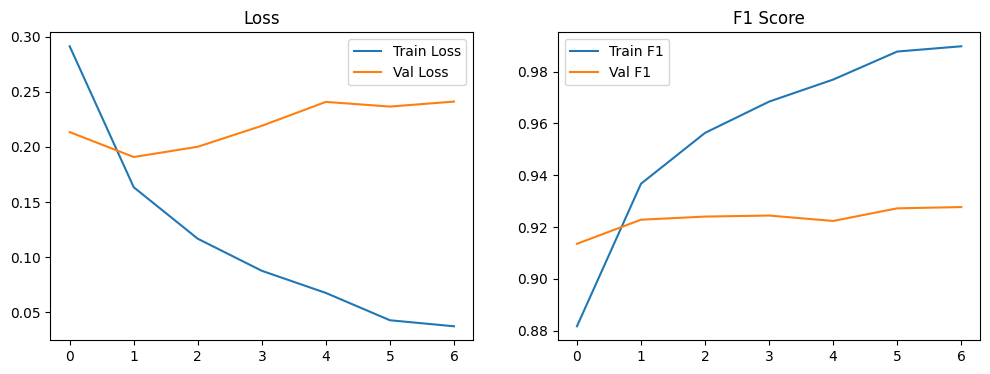

In [7]:
# TF-IDF векторизация
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf_vec = tfidf.fit_transform(X_train_tfidf)
X_val_tfidf_vec = tfidf.transform(X_val_tfidf)

# Создание модели
input_layer = Input(shape=(X_train_tfidf_vec.shape[1],))
dense1 = Dense(512, activation='relu')(input_layer)
dense2 = Dense(256, activation='relu')(dense1)
output_layer = Dense(len(label_columns), activation='sigmoid')(dense2)

model_tfidf = Model(inputs=input_layer, outputs=output_layer)
model_tfidf.compile(optimizer=Adam(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=[f1_macro])

# Коллбэки
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint('best_tfidf_model.h5', save_best_only=True),
    ReduceLROnPlateau(factor=0.1, patience=3)
]

# Обучение
history_tfidf = model_tfidf.fit(
    X_train_tfidf_vec.toarray(), y_train,
    validation_data=(X_val_tfidf_vec.toarray(), y_val),
    epochs=50,
    batch_size=64,
    callbacks=callbacks
)

plot_history(history_tfidf)

## Модель 2: Word2Vec + Нейронная сеть

2025-05-18 19:42:01.516743: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-05-18 19:42:01.518895: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-05-18 19:42:01.521625: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2025-05-18 19:42:02.002896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-05-18 19:42:02.005502: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-05-18 19:42:02.008455: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

366/370 [============================>.] - ETA: 0s - loss: 0.3027 - f1_macro: 0.8734

2025-05-18 19:42:10.386356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-05-18 19:42:10.388083: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-05-18 19:42:10.390283: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

370/370 [==============================] - 10s 15ms/step - loss: 0.3021 - f1_macro: 0.8737 - val_loss: 0.2413 - val_f1_macro: 0.9006 - lr: 0.0010
Epoch 2/30
370/370 [==============================] - 5s 13ms/step - loss: 0.2300 - f1_macro: 0.9051 - val_loss: 0.2268 - val_f1_macro: 0.9065 - lr: 0.0010
Epoch 3/30
370/370 [==============================] - 5s 13ms/step - loss: 0.2145 - f1_macro: 0.9109 - val_loss: 0.2142 - val_f1_macro: 0.9106 - lr: 0.0010
Epoch 4/30
370/370 [==============================] - 5s 13ms/step - loss: 0.2040 - f1_macro: 0.9162 - val_loss: 0.2066 - val_f1_macro: 0.9149 - lr: 0.0010
Epoch 5/30
370/370 [==============================] - 5s 13ms/step - loss: 0.1962 - f1_macro: 0.9196 - val_loss: 0.2039 - val_f1_macro: 0.9146 - lr: 0.0010
Epoch 6/30
370/370 [==============================] - 5s 13ms/step - loss: 0.1900 - f1_macro: 0.9221 - val_loss: 0.2009 - val_f1_macro: 0.9179 - lr: 0.0010
Epoch 7/30
370/370 [==============================] - 5s 13ms/step - loss:

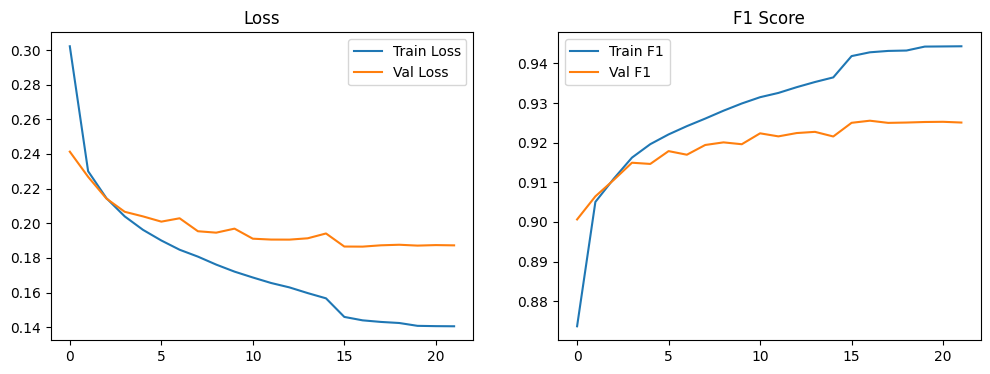

In [8]:
# Обучение Word2Vec
sentences = [text.split() for text in X_train_w2v]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=3, workers=4)

# Создание матрицы эмбеддингов
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_w2v)
vocab_size = len(tokenizer.word_index) + 1

embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

# Преобразование текстов в последовательности
X_train_w2v_seq = tokenizer.texts_to_sequences(X_train_w2v)
X_val_w2v_seq = tokenizer.texts_to_sequences(X_val_w2v)
max_len = 200
X_train_w2v_pad = pad_sequences(X_train_w2v_seq, maxlen=max_len)
X_val_w2v_pad = pad_sequences(X_val_w2v_seq, maxlen=max_len)

# Создание модели
input_layer = Input(shape=(max_len,))
embedding = Embedding(vocab_size, 100, weights=[embedding_matrix], 
                     input_length=max_len, trainable=False)(input_layer)
lstm = Bidirectional(LSTM(64))(embedding)
dense1 = Dense(128, activation='relu')(lstm)
output_layer = Dense(len(label_columns), activation='sigmoid')(dense1)

model_w2v = Model(inputs=input_layer, outputs=output_layer)
model_w2v.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=[f1_macro])

# Обучение
history_w2v = model_w2v.fit(
    X_train_w2v_pad, y_train,
    validation_data=(X_val_w2v_pad, y_val),
    epochs=30,
    batch_size=64,
    callbacks=callbacks
)

plot_history(history_w2v)

## Модель 3: CNN со встроенным эмбеддингом

Epoch 1/20
370/370 [==============================] - 61s 151ms/step - loss: 0.3259 - f1_macro: 0.8619 - val_loss: 0.2422 - val_f1_macro: 0.9008 - lr: 0.0010
Epoch 2/20
370/370 [==============================] - 26s 70ms/step - loss: 0.2093 - f1_macro: 0.9159 - val_loss: 0.2069 - val_f1_macro: 0.9162 - lr: 0.0010
Epoch 3/20
370/370 [==============================] - 16s 43ms/step - loss: 0.1585 - f1_macro: 0.9390 - val_loss: 0.1848 - val_f1_macro: 0.9277 - lr: 0.0010
Epoch 4/20
370/370 [==============================] - 10s 27ms/step - loss: 0.1202 - f1_macro: 0.9562 - val_loss: 0.1814 - val_f1_macro: 0.9306 - lr: 0.0010
Epoch 5/20
370/370 [==============================] - 7s 19ms/step - loss: 0.0900 - f1_macro: 0.9693 - val_loss: 0.1862 - val_f1_macro: 0.9326 - lr: 0.0010
Epoch 6/20
370/370 [==============================] - 6s 15ms/step - loss: 0.0666 - f1_macro: 0.9788 - val_loss: 0.1976 - val_f1_macro: 0.9346 - lr: 0.0010
Epoch 7/20
370/370 [==============================] - 4s 10

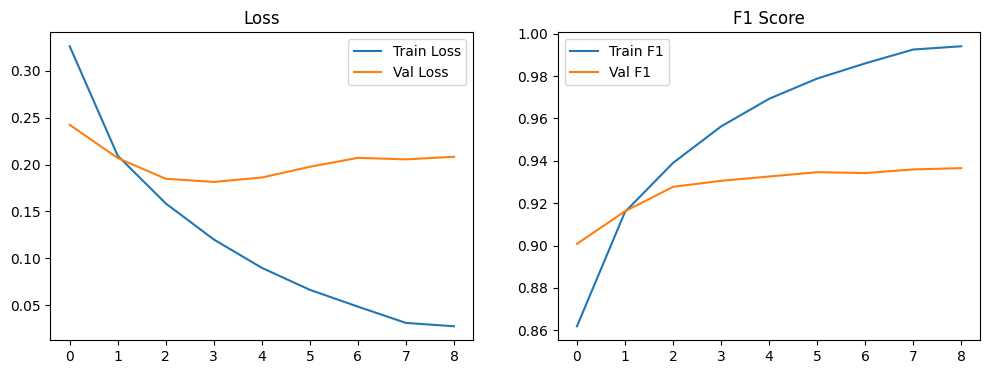

In [9]:
# Токенизация для CNN
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train_cnn)
X_train_cnn_seq = tokenizer.texts_to_sequences(X_train_cnn)
X_val_cnn_seq = tokenizer.texts_to_sequences(X_val_cnn)
max_len = 200
X_train_cnn_pad = pad_sequences(X_train_cnn_seq, maxlen=max_len)
X_val_cnn_pad = pad_sequences(X_val_cnn_seq, maxlen=max_len)

# Создание модели CNN
input_layer = Input(shape=(max_len,))
embedding = Embedding(10000, 128)(input_layer)
conv1 = Conv1D(128, 5, activation='relu')(embedding)
pool1 = GlobalMaxPooling1D()(conv1)
dense1 = Dense(64, activation='relu')(pool1)
output_layer = Dense(len(label_columns), activation='sigmoid')(dense1)

model_cnn = Model(inputs=input_layer, outputs=output_layer)
model_cnn.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=[f1_macro])

# Обучение
history_cnn = model_cnn.fit(
    X_train_cnn_pad, y_train,
    validation_data=(X_val_cnn_pad, y_val),
    epochs=20,
    batch_size=64,
    callbacks=callbacks
)

plot_history(history_cnn)

## Модель 4: RNN со встроенным эмбеддингом

2025-05-18 19:47:17.206193: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-05-18 19:47:17.208317: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-05-18 19:47:17.210165: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/20


2025-05-18 19:47:17.665835: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-05-18 19:47:17.667944: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-05-18 19:47:17.670357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

370/370 [==============================] - ETA: 0s - loss: 0.3339 - f1_macro: 0.8623

2025-05-18 19:48:02.911973: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-05-18 19:48:02.913454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-05-18 19:48:02.914780: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

370/370 [==============================] - 46s 117ms/step - loss: 0.3339 - f1_macro: 0.8623 - val_loss: 0.2541 - val_f1_macro: 0.8963 - lr: 0.0010
Epoch 2/20
370/370 [==============================] - 23s 61ms/step - loss: 0.2371 - f1_macro: 0.9029 - val_loss: 0.2343 - val_f1_macro: 0.9054 - lr: 0.0010
Epoch 3/20
370/370 [==============================] - 15s 40ms/step - loss: 0.2096 - f1_macro: 0.9159 - val_loss: 0.2166 - val_f1_macro: 0.9133 - lr: 0.0010
Epoch 4/20
370/370 [==============================] - 12s 33ms/step - loss: 0.1870 - f1_macro: 0.9267 - val_loss: 0.2102 - val_f1_macro: 0.9169 - lr: 0.0010
Epoch 5/20
370/370 [==============================] - 9s 26ms/step - loss: 0.1674 - f1_macro: 0.9353 - val_loss: 0.2065 - val_f1_macro: 0.9205 - lr: 0.0010
Epoch 6/20
370/370 [==============================] - 7s 20ms/step - loss: 0.1503 - f1_macro: 0.9427 - val_loss: 0.2063 - val_f1_macro: 0.9221 - lr: 0.0010
Epoch 7/20
370/370 [==============================] - 9s 23ms/step - l

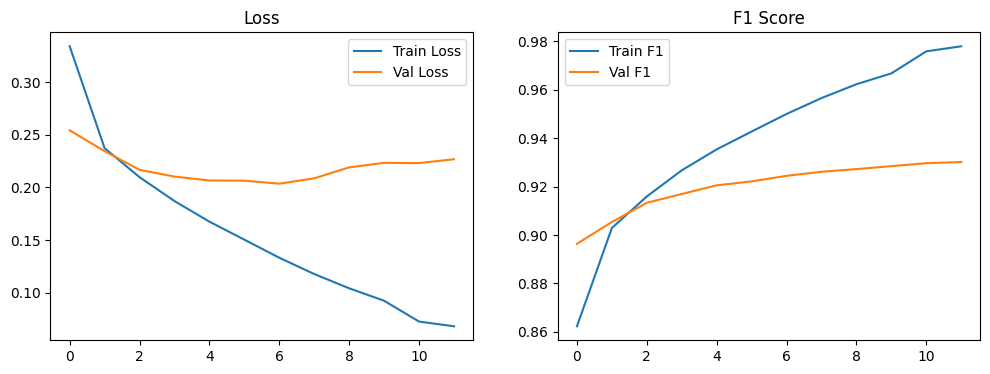

In [10]:
# Токенизация для RNN
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train_rnn)
X_train_rnn_seq = tokenizer.texts_to_sequences(X_train_rnn)
X_val_rnn_seq = tokenizer.texts_to_sequences(X_val_rnn)
max_len = 200
X_train_rnn_pad = pad_sequences(X_train_rnn_seq, maxlen=max_len)
X_val_rnn_pad = pad_sequences(X_val_rnn_seq, maxlen=max_len)

# Создание модели RNN
input_layer = Input(shape=(max_len,))
embedding = Embedding(10000, 128)(input_layer)
lstm = Bidirectional(LSTM(64))(embedding)
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(len(label_columns), activation='sigmoid')(dense1)

model_rnn = Model(inputs=input_layer, outputs=output_layer)
model_rnn.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=[f1_macro])

# Обучение
history_rnn = model_rnn.fit(
    X_train_rnn_pad, y_train,
    validation_data=(X_val_rnn_pad, y_val),
    epochs=20,
    batch_size=64,
    callbacks=callbacks
)

plot_history(history_rnn)

In [12]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout  # Добавлен Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import backend as K
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd

# Метрика F1 для Keras
def f1_macro(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Токенизация для BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
X_train_bert_enc = tokenizer(X_train_bert.tolist(), truncation=True, 
                            padding='max_length', max_length=128, 
                            return_tensors='tf')
X_val_bert_enc = tokenizer(X_val_bert.tolist(), truncation=True, 
                          padding='max_length', max_length=128, 
                          return_tensors='tf')

# Создание модели BERT
bert = TFBertModel.from_pretrained('bert-base-uncased')
input_ids = Input(shape=(128,), dtype=tf.int32)
attention_mask = Input(shape=(128,), dtype=tf.int32)

bert_output = bert(input_ids, attention_mask=attention_mask)[1]
dense1 = Dense(256, activation='relu')(bert_output)
dropout = Dropout(0.2)(dense1)  # Теперь Dropout определен
output_layer = Dense(len(label_columns), activation='sigmoid')(dropout)

model_bert = Model(inputs=[input_ids, attention_mask], outputs=output_layer)
model_bert.compile(optimizer=Adam(learning_rate=2e-5),
                  loss='binary_crossentropy',
                  metrics=[f1_macro])

# Коллбэки
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint('best_bert_model.h5', save_best_only=True),
    ReduceLROnPlateau(factor=0.1, patience=2)
]

# Обучение
history_bert = model_bert.fit(
    [X_train_bert_enc['input_ids'], X_train_bert_enc['attention_mask']], y_train,
    validation_data=([X_val_bert_enc['input_ids'], X_val_bert_enc['attention_mask']], y_val),
    epochs=5,
    batch_size=16,
    callbacks=callbacks
)

# Оценка модели
val_pred = model_bert.predict([X_val_bert_enc['input_ids'], X_val_bert_enc['attention_mask']])
val_pred_binary = (val_pred > 0.5).astype(int)
print("F1-score:", f1_score(y_val, val_pred_binary, average='macro'))

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/5
1479/1479 [==============================] - 333s 198ms/step - loss: 0.3787 - f1_macro: 0.8408 - val_loss: 0.3143 - val_f1_macro: 0.8686 - lr: 2.0000e-05
Epoch 2/5
1479/1479 [==============================] - 281s 190ms/step - loss: 0.3191 - f1_macro: 0.8655 - val_loss: 0.2957 - val_f1_macro: 0.8772 - lr: 2.0000e-05
Epoch 3/5
1479/1479 [==============================] - 281s 190ms/step - loss: 0.2905 - f1_macro: 0.8781 - val_loss: 0.2819 - val_f1_macro: 0.8834 - lr: 2.0000e-05
Epoch 4/5
1479/1479 [==============================] - 281s 190ms/step - loss: 0.2674 - f1_macro: 0.8884 - val_loss: 0.2712 - val_f1_macro: 0.8878 - lr: 2.0000e-05
Epoch 5/5
185/185 [==============================] - 18s 84ms/step
F1-score: 0.7425658580227952


In [15]:
## Финальное предсказание на тестовых данных для CNN модели с подбором порога

import numpy as np
from sklearn.metrics import f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. Создаем и обучаем токенизатор для CNN (как при обучении модели)
cnn_tokenizer = Tokenizer(num_words=10000)
cnn_tokenizer.fit_on_texts(X_train_cnn)  # X_train_cnn определен ранее

# 2. Функция для поиска оптимального порога
def find_optimal_threshold(y_true, y_probs):
    best_threshold = 0.5
    best_f1 = 0
    thresholds = np.linspace(0.3, 0.7, 41)
    
    for threshold in thresholds:
        y_pred = (y_probs > threshold).astype(int)
        current_f1 = f1_score(y_true, y_pred, average='macro')
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_threshold = threshold
    
    return best_threshold

# 3. Подготовка тестовых данных для CNN
test_df['text_cnn'] = test_df['text'].apply(clean_text_cnn)
test_texts = test_df['text_cnn'].values

# 4. Токенизация тестовых данных (используем CNN токенизатор)
test_seq = cnn_tokenizer.texts_to_sequences(test_texts)
test_pad = pad_sequences(test_seq, maxlen=200)  # Используем тот же max_len, что при обучении

# 5. Получаем предсказания вероятностей
test_probs = model_cnn.predict(test_pad)

# 6. Находим оптимальный порог на валидационных данных
val_probs = model_cnn.predict(X_val_cnn_pad)
optimal_threshold = find_optimal_threshold(y_val, val_probs)
print(f"Optimal threshold: {optimal_threshold:.4f}")

# 7. Применяем порог и сохраняем результаты
test_pred_binary = (test_probs > optimal_threshold).astype(int)

submission = pd.DataFrame({
    'id': test_df['id'],
    'labels': [' '.join(map(str, row)) for row in test_pred_binary]
})
submission.to_csv('submission_cnn.csv', index=False)

# 8. Оценка качества
val_pred = (val_probs > optimal_threshold).astype(int)
val_f1 = f1_score(y_val, val_pred, average='macro')
print(f"Validation F1-score: {val_f1:.4f} (threshold={optimal_threshold:.4f})")

185/185 [==============================] - 0s 1ms/step
Optimal threshold: 0.3300
Validation F1-score: 0.8325 (threshold=0.3300)
